# Topic-Analyse mit Topic-Modelling

In [5]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
articles_data = pd.read_csv('2-4-data-extended-keywords-sentiment.csv')
articles = pd.DataFrame(articles_data)
articles.head()

,date,time,category,headline,text,upload,upload-hour,weekday,length,keywords,sentiment_headline,sentiment_text,sentiment_prob_headline_positive,sentiment_prob_headline_negative,sentiment_prob_headline_neutral,sentiment_prob_text_positive,sentiment_prob_text_negative,sentiment_prob_text_neutral
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17,Friday,2908,"Politik, Gesellschaft, Extremismus, Rechtsextr...",neutral,neutral,0.000229,0.000604,0.999167,0.001950,0.010997,0.987053
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17,Friday,3504,"China, USA, Paracel-Inseln, Südchinesisches Me...",negative,neutral,0.026734,0.750409,0.222857,0.002821,0.010704,0.986475
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19,Friday,2445,"Politik, Gewalt gegen Politiker, SPD, Wahlkamp...",negative,negative,0.005901,0.979033,0.015065,0.019161,0.757548,0.223291
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8,Friday,2984,"Bürgergeld, Landkreistag, Vermögensregelungen,...",neutral,neutral,0.000009,0.000026,0.999965,0.002032,0.010209,0.987759
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15,Friday,2570,"Regierungsflugzeug, Technikproblem, Verzögerun...",neutral,negative,0.000084,0.000253,0.999663,0.012173,0.830547,0.157280


In [27]:
documents = articles['text'].tolist()
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(documents)
articles['topic'] = topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3960,-1_die_der_und_in,"[die, der, und, in, das, den, von, fr, zu, ist]",[Bei der Europawahl am Sonntag dürfen in Deuts...
1,0,430,0_polizei_mann_einem_am,"[polizei, mann, einem, am, worden, ein, in, ve...",[In der Schweiz geht ein Mann mit einem Messer...
2,1,426,1_auto_verletzt_polizei_unfall,"[auto, verletzt, polizei, unfall, fahrer, wage...",[Eine Frau stirbt bei einem Unfall auf einer L...
3,2,359,2_ich_sie_und_ihr,"[ich, sie, und, ihr, mit, sich, ist, er, unter...",[Gerade erst liegt eine erfolgreiche Nordameri...
4,3,209,3_trump_biden_trumps_donald,"[trump, biden, trumps, donald, demokraten, er,...",[Donald Trump muss sich wochenlang der Justiz ...
...,...,...,...,...,...
140,139,10,139_maddie_mccann_zeugin_terenzi,"[maddie, mccann, zeugin, terenzi, christian, i...",[Im Fall Maddie steht Christian B. unter Mordv...
141,140,10,140_pflege_kindergeld_pflegekrfte_kinderfreibe...,"[pflege, kindergeld, pflegekrfte, kinderfreibe...","[Wer Kinder in die Welt setzt, übernimmt große..."
142,141,10,141_landkreis_hochwasser_landratsamt_dwd,"[landkreis, hochwasser, landratsamt, dwd, gnzb...",[Im saarländischen Landkreis Neunkirchen herrs...
143,142,10,142_galeria_filialen_denkhaus_kaufhof,"[galeria, filialen, denkhaus, kaufhof, karstad...",[Beim Warenhauskonzern Galeria Karstadt Kaufho...


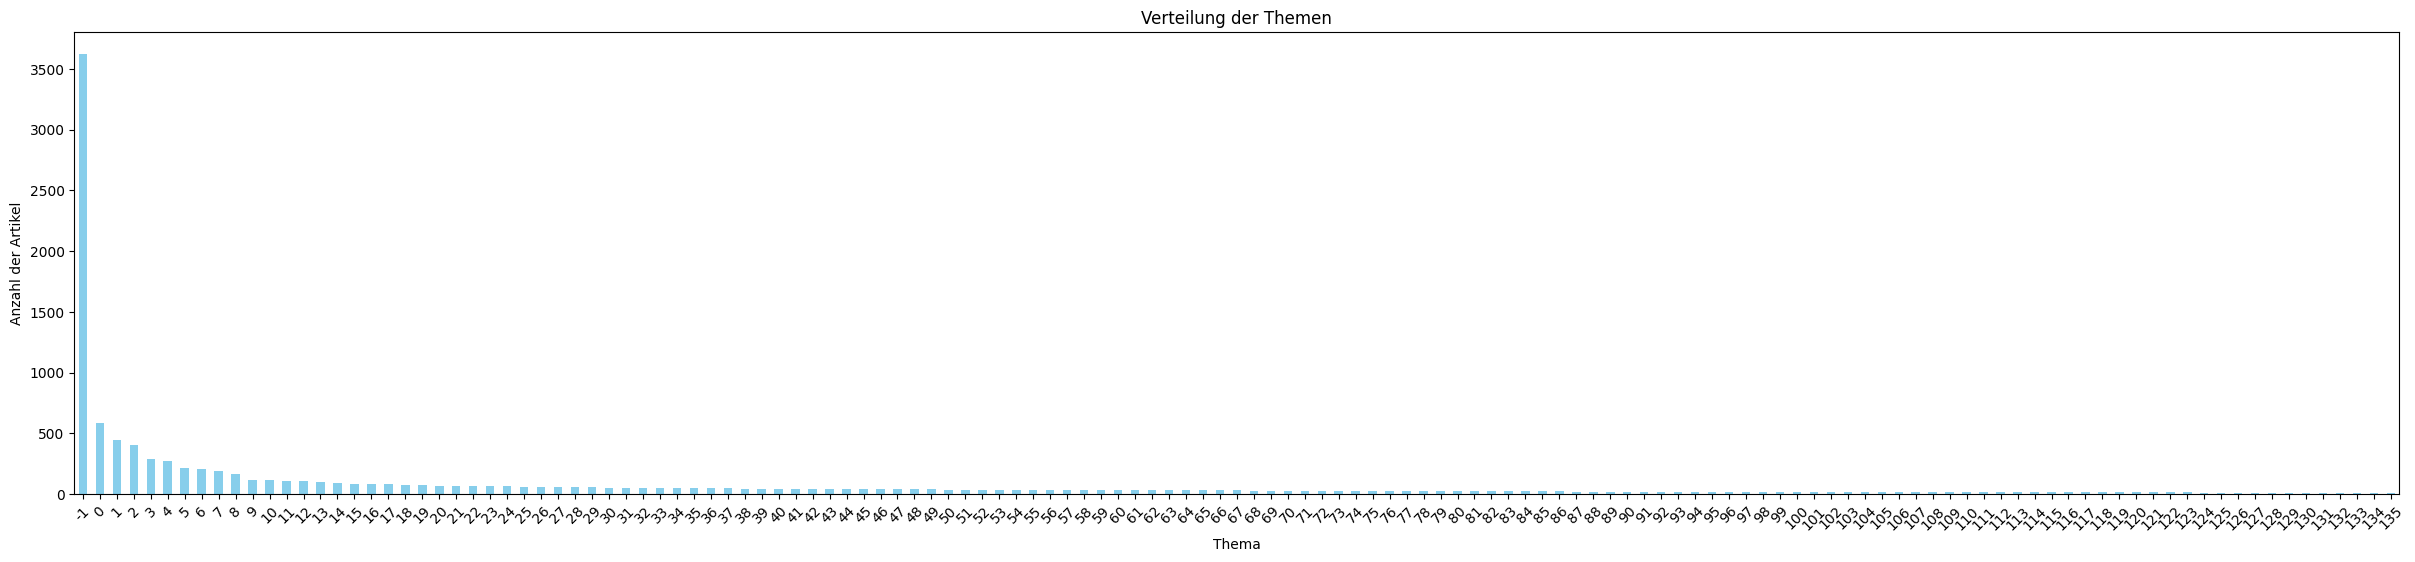

In [13]:
topic_counts = articles['topic'].value_counts()
plt.figure(figsize=(30, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Thema')
plt.ylabel('Anzahl der Artikel')
plt.title('Verteilung der Themen')
plt.xticks(ticks=range(len(topic_counts)), labels=[f'{i}' for i in topic_counts.index], rotation=45)
plt.show()

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/kaiherbst/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaiherbst/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stemmer = SnowballStemmer('german')
stop_words = set(stopwords.words('german'))

In [21]:
def preprocess_text_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text, language='german')
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [23]:
articles['processed_text'] = articles['text'].apply(preprocess_text_nltk)
articles.head()

,date,time,category,headline,text,upload,upload-hour,weekday,length,keywords,sentiment_headline,sentiment_text,sentiment_prob_headline_positive,sentiment_prob_headline_negative,sentiment_prob_headline_neutral,sentiment_prob_text_positive,sentiment_prob_text_negative,sentiment_prob_text_neutral,topic,processed_text
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17,Friday,2908,"Politik, Gesellschaft, Extremismus, Rechtsextr...",neutral,neutral,0.000229,0.000604,0.999167,0.001950,0.010997,0.987053,-1,vatertag steu mann alt militarfahrzeug reichsf...
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17,Friday,3504,"China, USA, Paracel-Inseln, Südchinesisches Me...",negative,neutral,0.026734,0.750409,0.222857,0.002821,0.010704,0.986475,32,china beansprucht sudchines meer nah umstritt ...
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19,Friday,2445,"Politik, Gewalt gegen Politiker, SPD, Wahlkamp...",negative,negative,0.005901,0.979033,0.015065,0.019161,0.757548,0.223291,-1,woch brutal attackiert matthias eck schildert ...
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8,Friday,2984,"Bürgergeld, Landkreistag, Vermögensregelungen,...",neutral,neutral,0.000009,0.000026,0.999965,0.002032,0.010209,0.987759,-1,beim burgergeld jetzig form bemangeln vertret ...
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15,Friday,2570,"Regierungsflugzeug, Technikproblem, Verzögerun...",neutral,negative,0.000084,0.000253,0.999663,0.012173,0.830547,0.157280,-1,deutsch regierungsflieg pannenanfall bekannt v...


In [24]:
documents = articles['processed_text'].tolist()
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(documents)
articles['topic'] = topics
articles.head()

,date,time,category,headline,text,upload,upload-hour,weekday,length,keywords,sentiment_headline,sentiment_text,sentiment_prob_headline_positive,sentiment_prob_headline_negative,sentiment_prob_headline_neutral,sentiment_prob_text_positive,sentiment_prob_text_negative,sentiment_prob_text_neutral,topic,processed_text
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17,Friday,2908,"Politik, Gesellschaft, Extremismus, Rechtsextr...",neutral,neutral,0.000229,0.000604,0.999167,0.001950,0.010997,0.987053,-1,vatertag steu mann alt militarfahrzeug reichsf...
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17,Friday,3504,"China, USA, Paracel-Inseln, Südchinesisches Me...",negative,neutral,0.026734,0.750409,0.222857,0.002821,0.010704,0.986475,9,china beansprucht sudchines meer nah umstritt ...
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19,Friday,2445,"Politik, Gewalt gegen Politiker, SPD, Wahlkamp...",negative,negative,0.005901,0.979033,0.015065,0.019161,0.757548,0.223291,-1,woch brutal attackiert matthias eck schildert ...
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8,Friday,2984,"Bürgergeld, Landkreistag, Vermögensregelungen,...",neutral,neutral,0.000009,0.000026,0.999965,0.002032,0.010209,0.987759,50,beim burgergeld jetzig form bemangeln vertret ...
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15,Friday,2570,"Regierungsflugzeug, Technikproblem, Verzögerun...",neutral,negative,0.000084,0.000253,0.999663,0.012173,0.830547,0.157280,-1,deutsch regierungsflieg pannenanfall bekannt v...


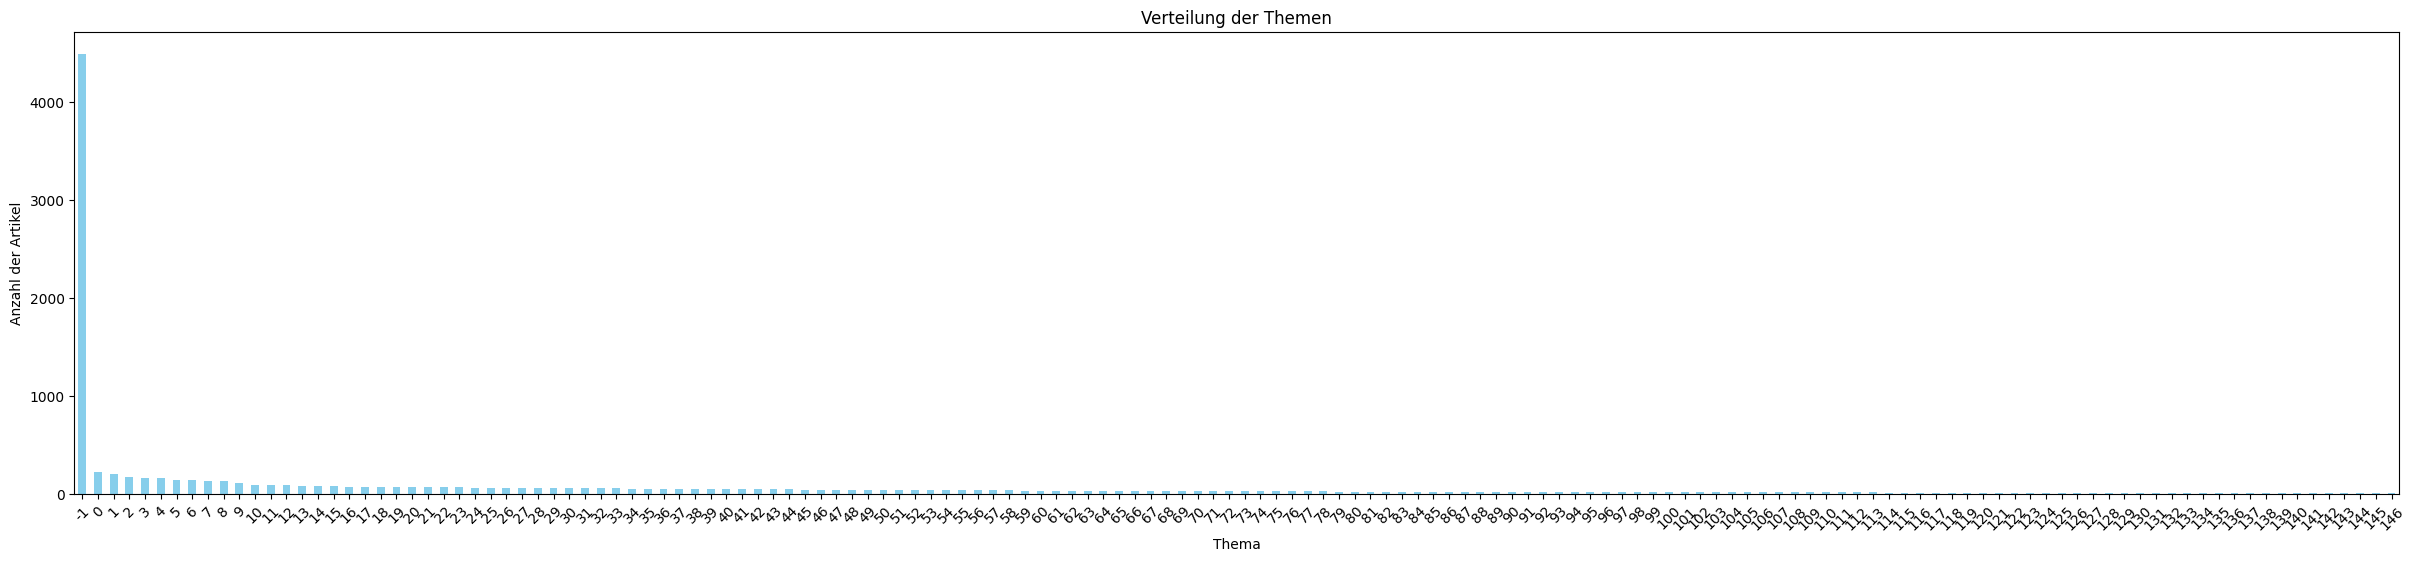

In [25]:
topic_counts = articles['topic'].value_counts()
plt.figure(figsize=(30, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Thema')
plt.ylabel('Anzahl der Artikel')
plt.title('Verteilung der Themen')
plt.xticks(ticks=range(len(topic_counts)), labels=[f'{i}' for i in topic_counts.index], rotation=45)
plt.show()

In [26]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4494,-1_mehr_jahr_sagt_sei,"[mehr, jahr, sagt, sei, wurd, ukrain, deutschl...",[ausgang parlamentswahl frankreich weich deuts...
1,0,226,0_israel_hamas_gazastreif_palastinens,"[israel, hamas, gazastreif, palastinens, rafah...",[stadt grenz agypt israel offensiv mehr millio...
2,1,203,1_trump_bid_trumps_demokrat,"[trump, bid, trumps, demokrat, republikan, don...",[donald trump wochenlang justiz stell erst str...
3,2,177,2_musik_song_band_album,"[musik, song, band, album, konzert, sang, fest...",[bereit vorprogramm coldplay aufgetret ed shee...
4,3,168,3_thuring_landkreis_landtag_land,"[thuring, landkreis, landtag, land, cdu, afd, ...",[thuring gewahlt wahlbeteil insgesamt schwach ...
...,...,...,...,...,...
143,142,11,142_harry_meghan_prinz_lilibet,"[harry, meghan, prinz, lilibet, harrys, pott, ...",[rummel prinz harry herzogin meghan reisst ab ...
144,143,11,143_affleck_lopez_jennif_ben,"[affleck, lopez, jennif, ben, gerucht, bennif,...",[vorbei geruchtekuch jennif lopez ben affleck ...
145,144,10,144_youssefian_streich_waterhous_michell,"[youssefian, streich, waterhous, michell, patt...",[sc freiburg lasst kulttrain christian streich...
146,145,10,145_leopard_knds_turm_panz,"[leopard, knds, turm, panz, kampfpanz, neu, sa...",[kurz rustungsmess eurosatory gibt knds entwic...
